In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
def normalize_data(data, method='minmax'):
    """Normalize the data using specified method ('minmax' or 'zscore')."""
    if method == 'minmax':
        min_val = np.min(data)
        max_val = np.max(data)
        return (data - min_val) / (max_val - min_val + 1e-8)
    elif method == 'zscore':
        mean = np.mean(data)
        std = np.std(data)
        return (data - mean) / (std + 1e-8)

In [3]:
free_data = np.load('../dataset/image/syn1_free_160.npy')
damp_data = np.load('../dataset/label/syn1_damp_160.npy')

free_data_patch_7 = np.load('../data/image/6.npy')
damp_data_patch_7 = np.load('../data/label/6.npy')

In [4]:
nx = free_data.shape[0]
dx = 4
nt = free_data.shape[1]
dt = 0.004

In [5]:
print(np.min(free_data), np.max(free_data), np.mean(free_data))
print(np.min(damp_data), np.max(damp_data), np.mean(damp_data))

-0.047735337 0.03577641 9.2465875e-09
-0.07970075 0.13365975 -1.1333392e-06


## Z-score normalization

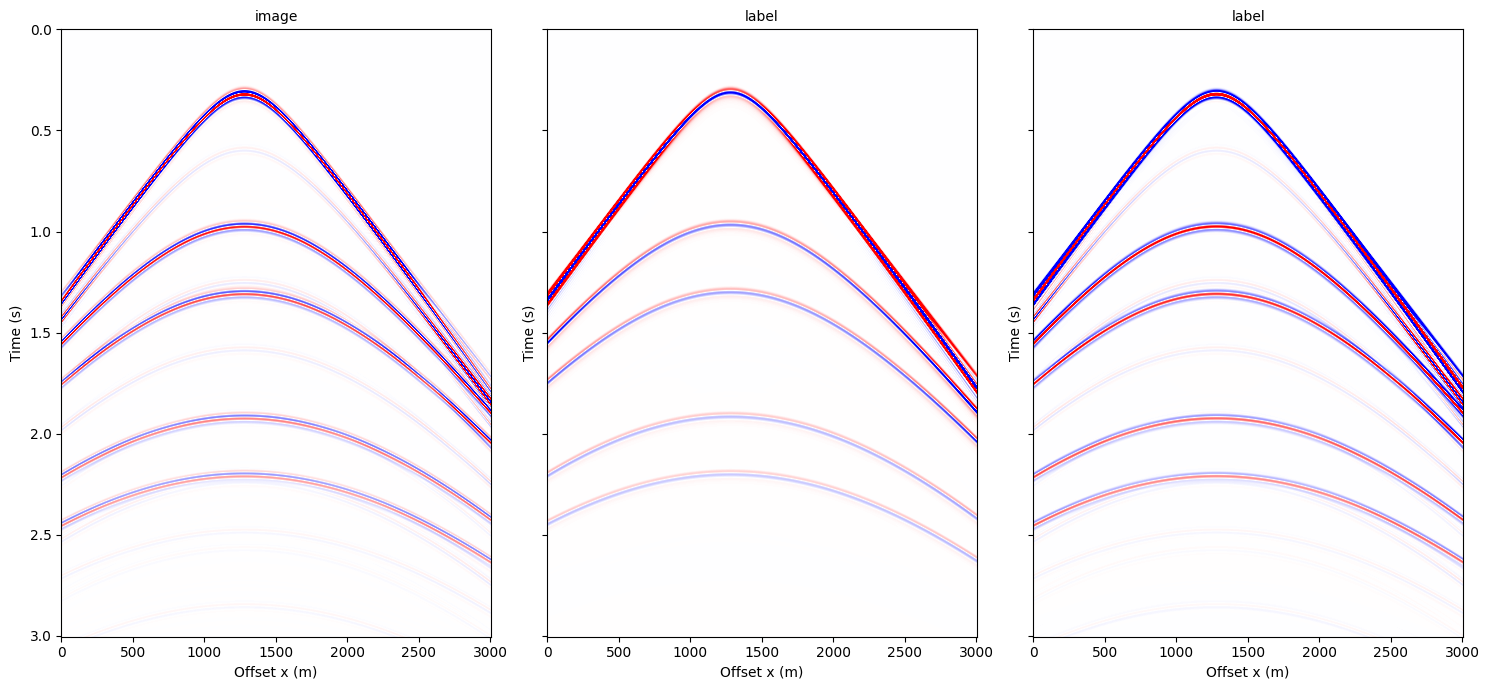

In [6]:
vmax = 1e-2
vmin = -vmax

fig, axs = plt.subplots(1, 3, figsize=(15, 7),sharey=True)

axs[0].imshow(free_data.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')
axs[0].set_title('image',fontsize=10)
axs[0].set_xlabel('Offset x (m)',fontsize=10)
axs[0].set_ylabel('Time (s)',fontsize=10)
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)

axs[1].imshow(damp_data.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')
axs[1].set_title('label',fontsize=10)
axs[1].set_xlabel('Offset x (m)',fontsize=10)
axs[1].set_ylabel('Time (s)',fontsize=10)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)

diff = free_data - damp_data
axs[2].imshow(diff.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')
axs[2].set_title('label',fontsize=10)
axs[2].set_xlabel('Offset x (m)',fontsize=10)
axs[2].set_ylabel('Time (s)',fontsize=10)
axs[2].tick_params(axis='x', labelsize=10)
axs[2].tick_params(axis='y', labelsize=10)

plt.tight_layout()

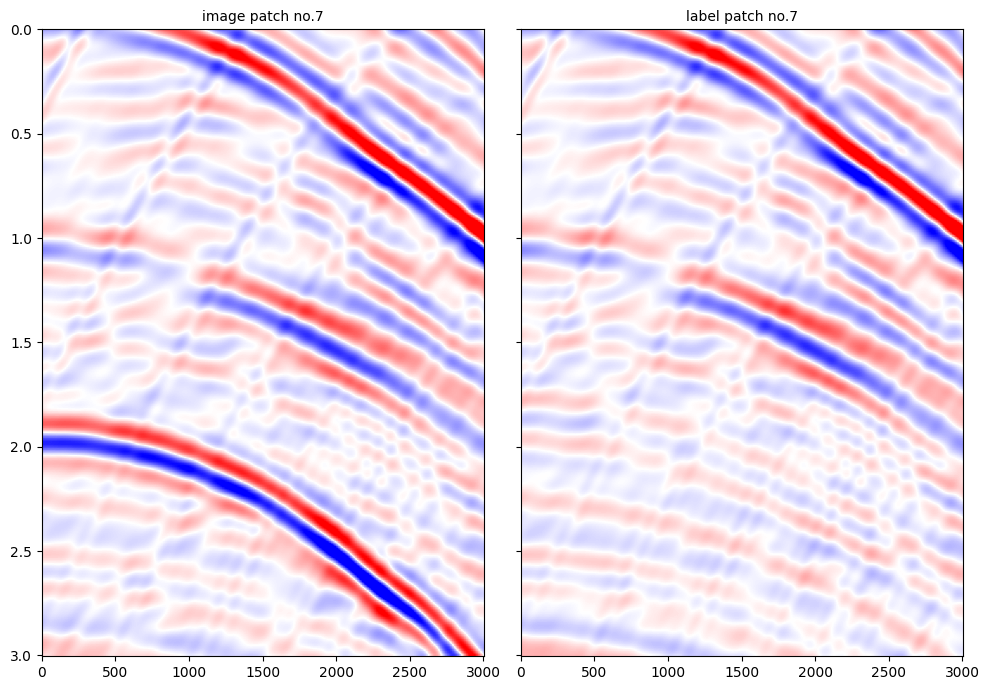

In [7]:
vmax = 1e-2
vmin = -vmax
fig, axs = plt.subplots(1, 2, figsize=(10, 7),sharey=True)

axs[0].imshow(free_data_patch_7.T, aspect='auto', vmin=vmin, vmax=vmax,
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')
axs[0].set_title('image patch no.7',fontsize=10)

axs[1].imshow(damp_data_patch_7.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')
axs[1].set_title('label patch no.7',fontsize=10)

plt.tight_layout()

In [8]:
image = np.load('../dataset/data_free_syn1.npz')['arr_0']
label = np.load('../dataset/data_damp_syn1.npz')['arr_0']

image = image[160, :, :]
label = label[160, :, :]
image.shape

(751, 751)

In [9]:
print(np.min(image), np.max(image), np.mean(image))
print(np.min(label), np.max(label), np.mean(label))

-0.047735337 0.03577641 9.2465875e-09
-0.07970075 0.13365975 -1.1333392e-06


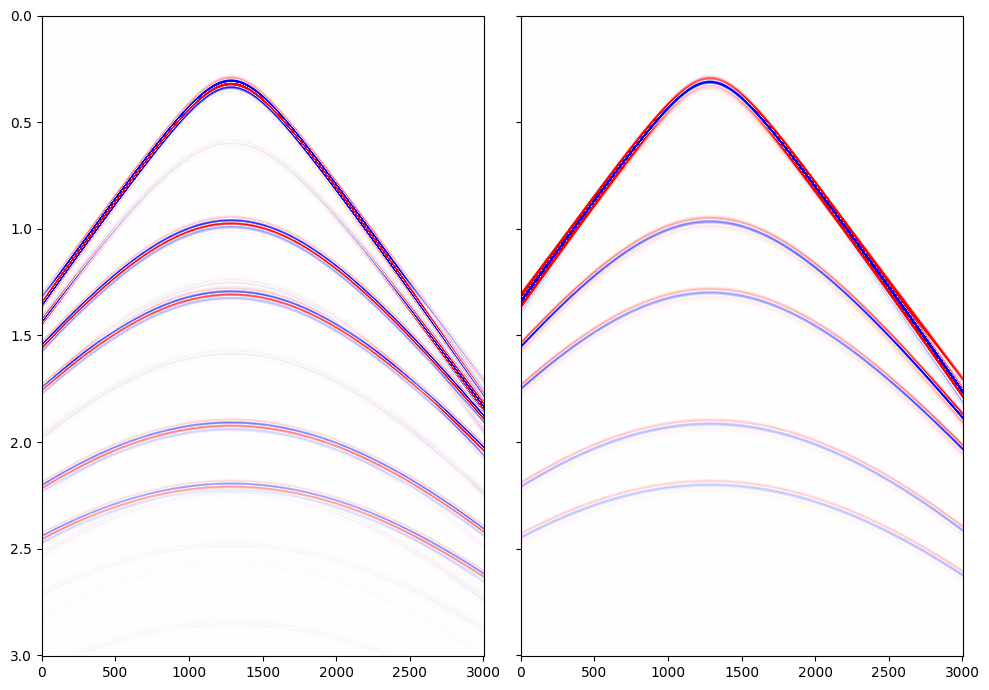

In [10]:
vmax = 1e-2
vmin = -vmax

fig, axs = plt.subplots(1, 2, figsize=(10, 7),sharey=True)

axs[0].imshow(image.T, aspect='auto', vmin=vmin, vmax=vmax,
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')

axs[1].imshow(label.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')

plt.tight_layout()

In [11]:
image = normalize_data(image, method='minmax')
label = normalize_data(label, method='minmax')

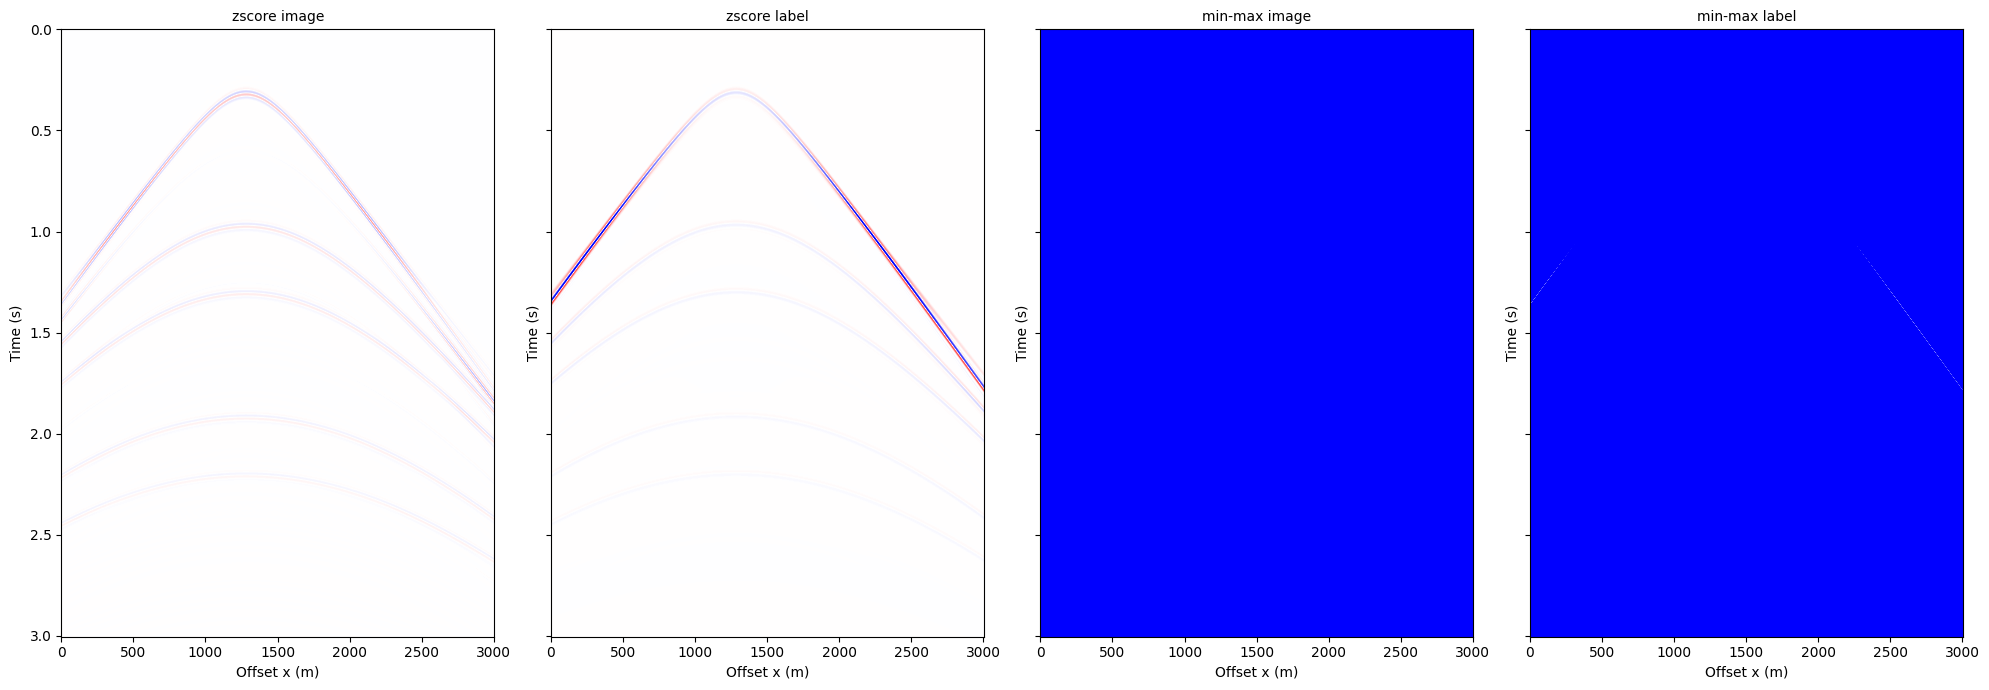

In [12]:
vmax = 1e-1
vmin = -vmax

fig, axs = plt.subplots(1, 4, figsize=(20, 7),sharey=True)

axs[0].imshow(free_data.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')
axs[0].set_title('zscore image',fontsize=10)
axs[0].set_xlabel('Offset x (m)',fontsize=10)
axs[0].set_ylabel('Time (s)',fontsize=10)
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)

axs[1].imshow(damp_data.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')
axs[1].set_title('zscore label',fontsize=10)
axs[1].set_xlabel('Offset x (m)',fontsize=10)
axs[1].set_ylabel('Time (s)',fontsize=10)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)

axs[2].imshow(image.T, aspect='auto', vmin=vmin, vmax=vmax,
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')
axs[2].set_title('min-max image',fontsize=10)
axs[2].set_xlabel('Offset x (m)',fontsize=10)
axs[2].set_ylabel('Time (s)',fontsize=10)
axs[2].tick_params(axis='x', labelsize=10)
axs[2].tick_params(axis='y', labelsize=10)

axs[3].imshow(label.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')
axs[3].set_title('min-max label',fontsize=10)
axs[3].set_xlabel('Offset x (m)',fontsize=10)
axs[3].set_ylabel('Time (s)',fontsize=10)
axs[3].tick_params(axis='x', labelsize=10)
axs[3].tick_params(axis='y', labelsize=10)

plt.tight_layout()